# Autoencoders [using PyTorch]

In [30]:
# print(os.listdir("data/"))

In [16]:
#import required modules.

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.autograd import Variable

import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt

In [17]:
def show_torch_image(torch_tensor):
    plt.imshow(torch_tensor.numpy().reshape(28, 28), cmap='gray')
    plt.show()

# Data loading 

Dataset source: https://www.kaggle.com/zalando-research/fashionmnist

In [18]:
# full dataset has nrows=60K
train = pd.read_csv("data/fashion-mnist_train.csv", nrows=10000) 


#normalization and preprocessing
X = train.iloc[:,1:].values / 255
X = (X-0.5)/0.5

Y = train.iloc[:,0].values

print(X.shape,Y.shape)

(10000, 784) (10000,)


**splitting dataset on train, validation**

In [19]:
trn_x,val_x,trn_y,val_y = train_test_split(X,Y,test_size=0.20)

**create torch tensor from numpy array**

In [20]:
num_workers=0
trn_x_torch = torch.from_numpy(trn_x).type(torch.FloatTensor)
trn_y_torch = torch.from_numpy(trn_y)

val_x_torch = torch.from_numpy(val_x).type(torch.FloatTensor)
val_y_torch = torch.from_numpy(val_y)

trn = TensorDataset(trn_x_torch,trn_y_torch)
val = TensorDataset(val_x_torch,val_y_torch)

trn_dataloader = torch.utils.data.DataLoader(trn,batch_size=100,shuffle=False, num_workers=num_workers)
val_dataloader = torch.utils.data.DataLoader(val,batch_size=100,shuffle=False, num_workers=num_workers)

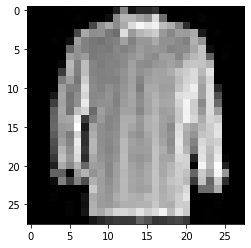

In [21]:
show_torch_image(trn_x_torch[1])

# Modal creating 

In [22]:
class AutoEncoder(nn.Module):
    
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        #encoder
        self.e1 = nn.Linear(784,28)
        self.e2 = nn.Linear(28,250)
        
        #Latent View
        self.lv = nn.Linear(250,10)
        
        #Decoder
        self.d1 = nn.Linear(10,250)
        self.d2 = nn.Linear(250,500)
        
        self.output_layer = nn.Linear(500,784)
        
    def forward(self,x):
        x = F.relu(self.e1(x))
        x = F.relu(self.e2(x))
        
        x = torch.sigmoid(self.lv(x))
        
        x = F.relu(self.d1(x))
        x = F.relu(self.d2(x))
        
        x = self.output_layer(x)
        return x

In [23]:
ae = AutoEncoder()
print(ae)

AutoEncoder(
  (e1): Linear(in_features=784, out_features=28, bias=True)
  (e2): Linear(in_features=28, out_features=250, bias=True)
  (lv): Linear(in_features=250, out_features=10, bias=True)
  (d1): Linear(in_features=10, out_features=250, bias=True)
  (d2): Linear(in_features=250, out_features=500, bias=True)
  (output_layer): Linear(in_features=500, out_features=784, bias=True)
)


# Model fitting

In [24]:
#define our optimizer and loss function
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(ae.parameters(), lr=1e-3)



In [25]:
losses = []
EPOCHS = 5
for epoch in range(EPOCHS):
    
    for batch_idx, (data,target) in enumerate(trn_dataloader):
        
        data = torch.autograd.Variable(data)
    
        optimizer.zero_grad()
        pred = ae(data)
        loss = loss_func(pred, data)
        losses.append(loss.cpu().data.item())
        
        loss.backward()
        optimizer.step()
        
        
        if batch_idx % 100 == 1:
            print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1,
                EPOCHS,
                batch_idx * len(data), 
                len(trn_dataloader.dataset),
                100. * batch_idx / len(trn_dataloader), 
                loss.cpu().data.item()), 
                end='')

        

 Train Epoch: 5/5 [100/8000 (1%)]	Loss: 0.112491

In [26]:
ae.eval()
predictions = []

for batch_idx, (data,target) in enumerate(val_dataloader):
        data = torch.autograd.Variable(data)
        pred = ae(data)
        
        for prediction in pred:
            predictions.append(prediction)
            
len(predictions)   

2000

# Error analysis 

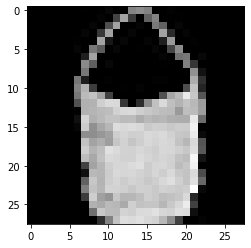

In [27]:
show_torch_image(val_x_torch[1])

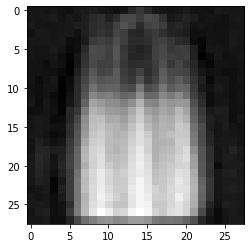

In [28]:
show_torch_image(predictions[1].detach())

# List of links to more detailed sources, tutorials, and alternative solutions

* https://github.com/dragen1860/Deep-Learning-with-PyTorch-Tutorials
* https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_fc_overcomplete_ae/
* https://www.kaggle.com/jagadeeshkotra/autoencoders-with-pytorch
* https://github.com/alipsgh/Quick-Tutorial-on-PyTorch/blob/master/ae.py